In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##########################################################
## Create dataset from 2018-06 to 2020-02-10
##########################################################

attendance = pd.read_csv('data/attendance.csv')
attendance = attendance[attendance['FACILITY_NAME'] == 'PortAventura World']
attendance['USAGE_DATE'] = pd.to_datetime(attendance['USAGE_DATE'])
attendance['Year'] = attendance['USAGE_DATE'].dt.year
attendance['Month'] = attendance['USAGE_DATE'].dt.month
attendance['Day'] = attendance['USAGE_DATE'].dt.day
attendance.drop(['FACILITY_NAME', 'USAGE_DATE'], inplace=True, axis=1)
attendance = attendance[(attendance['Year'] == 2018) | (attendance['Year'] == 2019) | ((attendance['Year'] == 2020) & (attendance['Month'] <= 2) & (attendance['Day'] <= 10))]

weather = pd.read_csv('data/weather_data.csv')
weather['dt'] = pd.to_datetime(weather['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')
weather['Year'] = weather['dt'].dt.year
weather['Month'] = weather['dt'].dt.month
weather['Day'] = weather['dt'].dt.day
weather = weather[['Year', 'Month', 'Day', 'temp', 'weather_main']]
weather = weather[((weather['Year'] == 2018) & (weather['Month'] >=6)) | (weather['Year'] == 2019) | ((weather['Year'] == 2020) & (weather['Month'] <= 2) & (weather['Day'] <= 10))]
weather_main_agg = weather.groupby(['Year', 'Month', 'Day'])['weather_main'].agg(lambda x: x.mode().iloc[0]).reset_index()
weather_temp_agg = weather.groupby(['Year', 'Month', 'Day'])['temp'].agg(lambda x: x.mean()).reset_index()
weather_agg = weather_main_agg.copy()
weather_agg['temp'] = weather_temp_agg['temp']
weather_encoded = pd.get_dummies(weather_agg['weather_main'], prefix='weather')
weather_agg = pd.concat([weather_agg, weather_encoded], axis=1)
weather_agg = weather_agg.drop('weather_main', axis=1)

merged_1 = pd.merge(weather_agg, attendance, how='left', on=['Year', 'Month', 'Day'])

entity = pd.read_csv('data/entity_schedule.csv')
entity = entity[entity['REF_CLOSING_DESCRIPTION'].isnull()]
entity.drop(columns=['REF_CLOSING_DESCRIPTION'], inplace=True)
entity['datetime_deb'] = pd.to_datetime(entity['DEB_TIME'])
entity['datetime_fin'] = pd.to_datetime(entity['FIN_TIME'])
entity['Year'] = entity['datetime_deb'].dt.year
entity['Month'] = entity['datetime_deb'].dt.month
entity['Day'] = entity['datetime_deb'].dt.day
entity['Hour_deb'] = entity['datetime_deb'].dt.hour
entity['Minute_deb'] = entity['datetime_deb'].dt.minute
entity['Day_fin'] = entity['datetime_fin'].dt.day
entity['Hour_fin'] = entity['datetime_fin'].dt.hour
entity['Minute_fin'] = entity['datetime_fin'].dt.minute
entity['duration'] = entity['datetime_fin'] - entity['datetime_deb']
entity['duration_hour'] = np.ceil(entity['duration'].dt.total_seconds() / 3600 * 100) / 100
entity.drop(columns=['UPDATE_TIME', 'DEB_TIME', 'FIN_TIME', 'datetime_deb', 'datetime_fin', 'duration'], inplace=True)

park = entity.copy()
park = park[park['ENTITY_DESCRIPTION_SHORT'] == 'PortAventura World']
park = park[((park['Year'] == 2018) & (park['Month'] >=6)) | (park['Year'] == 2019) | ((park['Year'] == 2020) & (park['Month'] <= 2) & (park['Day'] <= 10))]
park.sort_values(by=['Year', 'Month', 'Day'], ascending=True)
park.drop(columns=['ENTITY_DESCRIPTION_SHORT', 'ENTITY_TYPE', 'WORK_DATE', 'Hour_deb', 'Minute_deb', 'Day_fin', 'Hour_fin', 'Minute_fin'], inplace=True)
park = park.groupby(by = ['Year', 'Month', 'Day']).sum().reset_index()

merged_2 = pd.merge(merged_1, park, how='left', on=['Year', 'Month', 'Day'])

In [ ]:
merged_2

,Year,Month,Day,temp,weather_Clear,weather_Clouds,weather_Rain,attendance,duration_hour
0,2018,6,1,17.887500,False,True,False,46804,14.0
1,2018,6,2,19.352500,False,True,False,57940,14.0
2,2018,6,3,20.275833,False,True,False,44365,14.0
3,2018,6,4,20.721667,False,True,False,37617,14.0
4,2018,6,5,18.089583,False,True,False,32438,14.0
...,...,...,...,...,...,...,...,...,...
594,2020,2,6,4.067917,True,False,False,24583,10.0
595,2020,2,7,5.390000,True,False,False,27176,10.0
596,2020,2,8,8.715833,False,True,False,42548,11.0
597,2020,2,9,10.087917,False,True,False,29619,10.0


In [ ]:
##########################################################
## Create dataset from 2022-4 to 2022-06
##########################################################

attendance = pd.read_csv('data/attendance.csv')
attendance = attendance[attendance['FACILITY_NAME'] == 'PortAventura World']
attendance['USAGE_DATE'] = pd.to_datetime(attendance['USAGE_DATE'])
attendance['Year'] = attendance['USAGE_DATE'].dt.year
attendance['Month'] = attendance['USAGE_DATE'].dt.month
attendance['Day'] = attendance['USAGE_DATE'].dt.day
attendance.drop(['FACILITY_NAME', 'USAGE_DATE'], inplace=True, axis=1)
attendance = attendance[(attendance['Year'] == 2022) & ((attendance['Month'] >=4) & (attendance['Month'] <= 6))]

weather = pd.read_csv('data/weather_data.csv')
weather['dt'] = pd.to_datetime(weather['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')
weather['Year'] = weather['dt'].dt.year
weather['Month'] = weather['dt'].dt.month
weather['Day'] = weather['dt'].dt.day
weather = weather[['Year', 'Month', 'Day', 'temp', 'weather_main']]
weather = weather[((weather['Year'] == 2022) & ((weather['Month'] >=4) & (weather['Month'] <= 6)))]
weather_main_agg = weather.groupby(['Year', 'Month', 'Day'])['weather_main'].agg(lambda x: x.mode().iloc[0]).reset_index()
weather_temp_agg = weather.groupby(['Year', 'Month', 'Day'])['temp'].agg(lambda x: x.mean()).reset_index()
weather_agg = weather_main_agg.copy()
weather_agg['temp'] = weather_temp_agg['temp']
weather_encoded = pd.get_dummies(weather_agg['weather_main'], prefix='weather')
weather_agg = pd.concat([weather_agg, weather_encoded], axis=1)
weather_agg = weather_agg.drop('weather_main', axis=1)
# weather_agg = weather_agg.iloc[:117, :]

merged_3 = pd.merge(weather_agg, attendance, how='left', on=['Year', 'Month', 'Day'])

entity = pd.read_csv('data/entity_schedule.csv')
entity = entity[entity['REF_CLOSING_DESCRIPTION'].isnull()]
entity.drop(columns=['REF_CLOSING_DESCRIPTION'], inplace=True)
entity['datetime_deb'] = pd.to_datetime(entity['DEB_TIME'])
entity['datetime_fin'] = pd.to_datetime(entity['FIN_TIME'])
entity['Year'] = entity['datetime_deb'].dt.year
entity['Month'] = entity['datetime_deb'].dt.month
entity['Day'] = entity['datetime_deb'].dt.day
entity['Hour_deb'] = entity['datetime_deb'].dt.hour
entity['Minute_deb'] = entity['datetime_deb'].dt.minute
entity['Day_fin'] = entity['datetime_fin'].dt.day
entity['Hour_fin'] = entity['datetime_fin'].dt.hour
entity['Minute_fin'] = entity['datetime_fin'].dt.minute
entity['duration'] = entity['datetime_fin'] - entity['datetime_deb']
entity['duration_hour'] = np.ceil(entity['duration'].dt.total_seconds() / 3600 * 100) / 100
entity.drop(columns=['UPDATE_TIME', 'DEB_TIME', 'FIN_TIME', 'datetime_deb', 'datetime_fin', 'duration'], inplace=True)

park = entity.copy()
park = park[park['ENTITY_DESCRIPTION_SHORT'] == 'PortAventura World']
park = park[((park['Year'] == 2022) & ((park['Month'] >=4) & (park['Month'] <= 6)))]
park.sort_values(by=['Year', 'Month', 'Day'], ascending=True)
park.drop(columns=['ENTITY_DESCRIPTION_SHORT', 'ENTITY_TYPE', 'WORK_DATE', 'Hour_deb', 'Minute_deb', 'Day_fin', 'Hour_fin', 'Minute_fin'], inplace=True)
park = park.groupby(by = ['Year', 'Month', 'Day']).sum().reset_index()

missing =  pd.DataFrame({'Year': [2022, 2022],'Month': [6, 6], 'Day': [1, 20], 'duration_hour': [14.5, 14.5]})
park = pd.concat([park, missing], ignore_index=True)
park = park.sort_values(by=['Year', 'Month', 'Day'], ascending=True)
# park = park.iloc[:117, :]
# park = park.reset_index(drop=True)

merged_4 = pd.merge(merged_3, park, how='left', on=['Year', 'Month', 'Day'])

In [ ]:
##########################################################
## Create dataset of 2022-07
##########################################################

attendance = pd.read_csv('data/attendance.csv')
attendance = attendance[attendance['FACILITY_NAME'] == 'PortAventura World']
attendance['USAGE_DATE'] = pd.to_datetime(attendance['USAGE_DATE'])
attendance['Year'] = attendance['USAGE_DATE'].dt.year
attendance['Month'] = attendance['USAGE_DATE'].dt.month
attendance['Day'] = attendance['USAGE_DATE'].dt.day
attendance.drop(['FACILITY_NAME', 'USAGE_DATE'], inplace=True, axis=1)
attendance = attendance[(attendance['Year'] == 2022) & (attendance['Month'] == 7)]

weather = pd.read_csv('data/weather_data.csv')
weather['dt'] = pd.to_datetime(weather['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')
weather['Year'] = weather['dt'].dt.year
weather['Month'] = weather['dt'].dt.month
weather['Day'] = weather['dt'].dt.day
weather = weather[['Year', 'Month', 'Day', 'temp', 'weather_main']]
weather = weather[((weather['Year'] == 2022) & (weather['Month'] == 7))]
weather_main_agg = weather.groupby(['Year', 'Month', 'Day'])['weather_main'].agg(lambda x: x.mode().iloc[0]).reset_index()
weather_temp_agg = weather.groupby(['Year', 'Month', 'Day'])['temp'].agg(lambda x: x.mean()).reset_index()
weather_agg = weather_main_agg.copy()
weather_agg['temp'] = weather_temp_agg['temp']
weather_encoded = pd.get_dummies(weather_agg['weather_main'], prefix='weather')
weather_agg = pd.concat([weather_agg, weather_encoded], axis=1)
weather_agg = weather_agg.drop('weather_main', axis=1)
weather_agg = weather_agg.iloc[:26, ]

merged_5 = pd.merge(weather_agg, attendance, how='left', on=['Year', 'Month', 'Day'])

entity = pd.read_csv('data/entity_schedule.csv')
entity = entity[entity['REF_CLOSING_DESCRIPTION'].isnull()]
entity.drop(columns=['REF_CLOSING_DESCRIPTION'], inplace=True)
entity['datetime_deb'] = pd.to_datetime(entity['DEB_TIME'])
entity['datetime_fin'] = pd.to_datetime(entity['FIN_TIME'])
entity['Year'] = entity['datetime_deb'].dt.year
entity['Month'] = entity['datetime_deb'].dt.month
entity['Day'] = entity['datetime_deb'].dt.day
entity['Hour_deb'] = entity['datetime_deb'].dt.hour
entity['Minute_deb'] = entity['datetime_deb'].dt.minute
entity['Day_fin'] = entity['datetime_fin'].dt.day
entity['Hour_fin'] = entity['datetime_fin'].dt.hour
entity['Minute_fin'] = entity['datetime_fin'].dt.minute
entity['duration'] = entity['datetime_fin'] - entity['datetime_deb']
entity['duration_hour'] = np.ceil(entity['duration'].dt.total_seconds() / 3600 * 100) / 100
entity.drop(columns=['UPDATE_TIME', 'DEB_TIME', 'FIN_TIME', 'datetime_deb', 'datetime_fin', 'duration'], inplace=True)

park = entity.copy()
park = park[park['ENTITY_DESCRIPTION_SHORT'] == 'PortAventura World']
park = park[(park['Year'] == 2022) & (park['Month'] == 7)]
park.sort_values(by=['Year', 'Month', 'Day'], ascending=True)
park.drop(columns=['ENTITY_DESCRIPTION_SHORT', 'ENTITY_TYPE', 'WORK_DATE', 'Hour_deb', 'Minute_deb', 'Day_fin', 'Hour_fin', 'Minute_fin'], inplace=True)
park = park.groupby(by = ['Year', 'Month', 'Day']).sum().reset_index()
park = park.iloc[:26, :]

merged_6 = pd.merge(merged_5, park, how='left', on=['Year', 'Month', 'Day'])

In [ ]:
merged_6

,Year,Month,Day,temp,weather_Clear,weather_Clouds,attendance,duration_hour
0,2022,7,1,16.103333,False,True,45094,14.5
1,2022,7,2,19.365000,False,True,51153,14.5
2,2022,7,3,18.702917,False,True,45441,14.5
3,2022,7,4,19.143333,False,True,47474,14.5
4,2022,7,5,19.148333,True,False,46780,14.5
5,2022,7,6,19.674583,True,False,46463,14.5
6,2022,7,7,18.026250,False,True,44514,14.5
7,2022,7,8,19.157083,True,False,40119,14.5
8,2022,7,9,21.806250,False,True,39407,14.5
9,2022,7,10,20.157917,True,False,42301,14.5


In [ ]:
merged_2

,Year,Month,Day,temp,weather_Clear,weather_Clouds,weather_Rain,attendance,duration_hour
0,2018,6,1,17.887500,False,True,False,46804,14.0
1,2018,6,2,19.352500,False,True,False,57940,14.0
2,2018,6,3,20.275833,False,True,False,44365,14.0
3,2018,6,4,20.721667,False,True,False,37617,14.0
4,2018,6,5,18.089583,False,True,False,32438,14.0
...,...,...,...,...,...,...,...,...,...
594,2020,2,6,4.067917,True,False,False,24583,10.0
595,2020,2,7,5.390000,True,False,False,27176,10.0
596,2020,2,8,8.715833,False,True,False,42548,11.0
597,2020,2,9,10.087917,False,True,False,29619,10.0


In [ ]:
merged_4

,Year,Month,Day,temp,weather_Clear,weather_Clouds,weather_Rain,attendance,duration_hour
0,2022,4,1,1.621250,False,True,False,25335,12.5
1,2022,4,2,3.345833,False,True,False,39159,14.5
2,2022,4,3,4.254583,False,True,False,35848,14.5
3,2022,4,4,5.307500,False,True,False,38509,14.5
4,2022,4,5,9.559583,False,True,False,38824,14.5
...,...,...,...,...,...,...,...,...,...
86,2022,6,26,16.474167,False,True,False,45930,14.5
87,2022,6,27,18.193750,False,True,False,47382,14.5
88,2022,6,28,19.885000,False,True,False,48350,14.5
89,2022,6,29,20.211250,False,True,False,45662,14.5


In [ ]:
merged_df = pd.concat([merged_2, merged_4], ignore_index=True)
merged_df

,Year,Month,Day,temp,weather_Clear,weather_Clouds,weather_Rain,attendance,duration_hour
0,2018,6,1,17.887500,False,True,False,46804,14.0
1,2018,6,2,19.352500,False,True,False,57940,14.0
2,2018,6,3,20.275833,False,True,False,44365,14.0
3,2018,6,4,20.721667,False,True,False,37617,14.0
4,2018,6,5,18.089583,False,True,False,32438,14.0
...,...,...,...,...,...,...,...,...,...
685,2022,6,26,16.474167,False,True,False,45930,14.5
686,2022,6,27,18.193750,False,True,False,47382,14.5
687,2022,6,28,19.885000,False,True,False,48350,14.5
688,2022,6,29,20.211250,False,True,False,45662,14.5


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras_self_attention import SeqSelfAttention

categorical_features = ['weather_Clear', 'weather_Clouds', 'weather_Rain']
numerical_features = ['temp', 'duration_hour']
target = 'attendance'

In [ ]:
# Preprocessing
features_encoded = np.concatenate([merged_df[categorical_features].values, merged_df[numerical_features].values], axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.concatenate([features_encoded, merged_df[[target]].values], axis=1))

In [ ]:
# Define a function to create input sequences and corresponding target variable
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])
        y.append(data[i+sequence_length, -1])
    return np.array(X), np.array(y)

In [ ]:
# Set the sequence length
sequence_length = 20
# Create sequences for training
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Split the data into training and testing sets
for i in range(2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), verbose=2)
    # Make predictions
    y_pred = model.predict(X_test)

Epoch 1/30

9/9 - 2s - loss: 0.0818 - val_loss: 0.0517 - 2s/epoch - 209ms/step
Epoch 2/30
9/9 - 0s - loss: 0.0469 - val_loss: 0.0269 - 83ms/epoch - 9ms/step
Epoch 3/30
9/9 - 0s - loss: 0.0339 - val_loss: 0.0310 - 76ms/epoch - 8ms/step
Epoch 4/30
9/9 - 0s - loss: 0.0327 - val_loss: 0.0262 - 76ms/epoch - 8ms/step
Epoch 5/30
9/9 - 0s - loss: 0.0312 - val_loss: 0.0260 - 75ms/epoch - 8ms/step
Epoch 6/30
9/9 - 0s - loss: 0.0309 - val_loss: 0.0260 - 74ms/epoch - 8ms/step
Epoch 7/30
9/9 - 0s - loss: 0.0304 - val_loss: 0.0256 - 85ms/epoch - 9ms/step
Epoch 8/30
9/9 - 0s - loss: 0.0303 - val_loss: 0.0255 - 75ms/epoch - 8ms/step
Epoch 9/30
9/9 - 0s - loss: 0.0302 - val_loss: 0.0254 - 73ms/epoch - 8ms/step
Epoch 10/30
9/9 - 0s - loss: 0.0300 - val_loss: 0.0252 - 76ms/epoch - 8ms/step
Epoch 11/30
9/9 - 0s - loss: 0.0298 - val_loss: 0.0252 - 72ms/epoch - 8ms/step
Epoch 12/30
9/9 - 0s - loss: 0.0299 - val_loss: 0.0251 - 77ms/epoch - 9ms/step
Epoch 13/30
9/9 - 0s - loss: 0.0297 - val_loss: 0.0249 - 90m

In [ ]:
#########################################
### test and assess feasibility
#########################################

X_test_last = X_test[:, -1, :-1].reshape(-1, 5 - 1)
y_pred_inv = np.hstack((X_test_last, y_pred.reshape(-1, 1)))
y_test_inv = np.hstack((X_test_last, y_test.reshape(-1, 1)))

mse = mean_squared_error(y_test_inv[:, -1], y_pred_inv[:, -1])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.02297103501366234


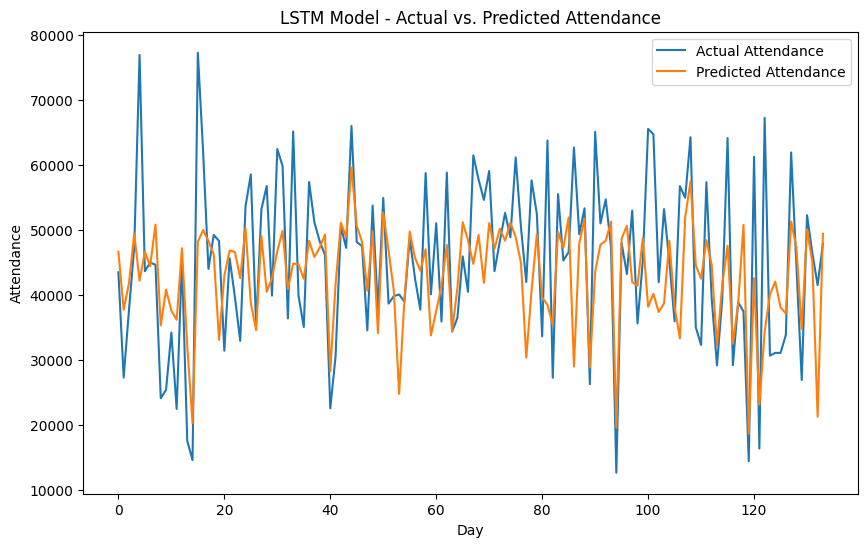

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler.fit_transform(merged_df[target].values.reshape(-1, 1))
denormalized_y_pred = scaler.inverse_transform(y_pred_inv[:, -1].reshape(-1, 1))
denormalized_y_test = scaler.inverse_transform(y_test_inv[:, -1].reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(denormalized_y_test, label='Actual Attendance')
plt.plot(denormalized_y_pred, label='Predicted Attendance')
plt.xlabel('Day')
plt.ylabel('Attendance')
plt.title('LSTM Model - Actual vs. Predicted Attendance')
plt.legend()
plt.show()

In [ ]:
test = merged_df[(merged_df['Year'] == 2022 ) & ((merged_df['Month'] == 6) | (merged_df['Month'] == 5))]
test

,Year,Month,Day,temp,weather_Clear,weather_Clouds,weather_Rain,attendance,duration_hour
629,2022,5,1,11.150000,False,True,False,45629,14.5
630,2022,5,2,13.026667,False,True,False,47266,14.5
631,2022,5,3,13.919583,False,True,False,50745,14.5
632,2022,5,4,13.165000,False,True,False,48640,14.5
633,2022,5,5,13.577917,False,True,False,51468,14.5
...,...,...,...,...,...,...,...,...,...
685,2022,6,26,16.474167,False,True,False,45930,14.5
686,2022,6,27,18.193750,False,True,False,47382,14.5
687,2022,6,28,19.885000,False,True,False,48350,14.5
688,2022,6,29,20.211250,False,True,False,45662,14.5


In [ ]:
###############################################################
### Predicting July
###############################################################
test = merged_df[(merged_df['Year'] == 2022 ) & ((merged_df['Month'] == 6 )| (merged_df['Month'] == 5))]
features_encoded = np.concatenate([test[categorical_features].values, test[numerical_features].values], axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.concatenate([features_encoded, test[[target]].values], axis=1))

sequence_length = 20
X, _ = create_sequences(scaled_data, sequence_length)
june_pred = model.predict(X)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_y = scaler.fit_transform(test[[target]].values.reshape(-1, 1))
denormalized_pred = scaler.inverse_transform(june_pred)
denormalized_pred = denormalized_pred[:26]

2/2 [==============================] - 0s 2ms/step


In [ ]:
actual = merged_df[(merged_df['Year'] == 2022) & (merged_df['Month'] <= 6)].copy()
actual['timestamp'] = actual['Month'].astype(str) + '-' + actual['Day'].astype(str)
july = merged_6
july['attendance'] = np.ceil(denormalized_pred)
july['timestamp'] = july['Month'].astype(str) + '-' + july['Day'].astype(str)
merged_2022 = pd.concat([actual, july])
merged_2022.set_index('timestamp', inplace=True)

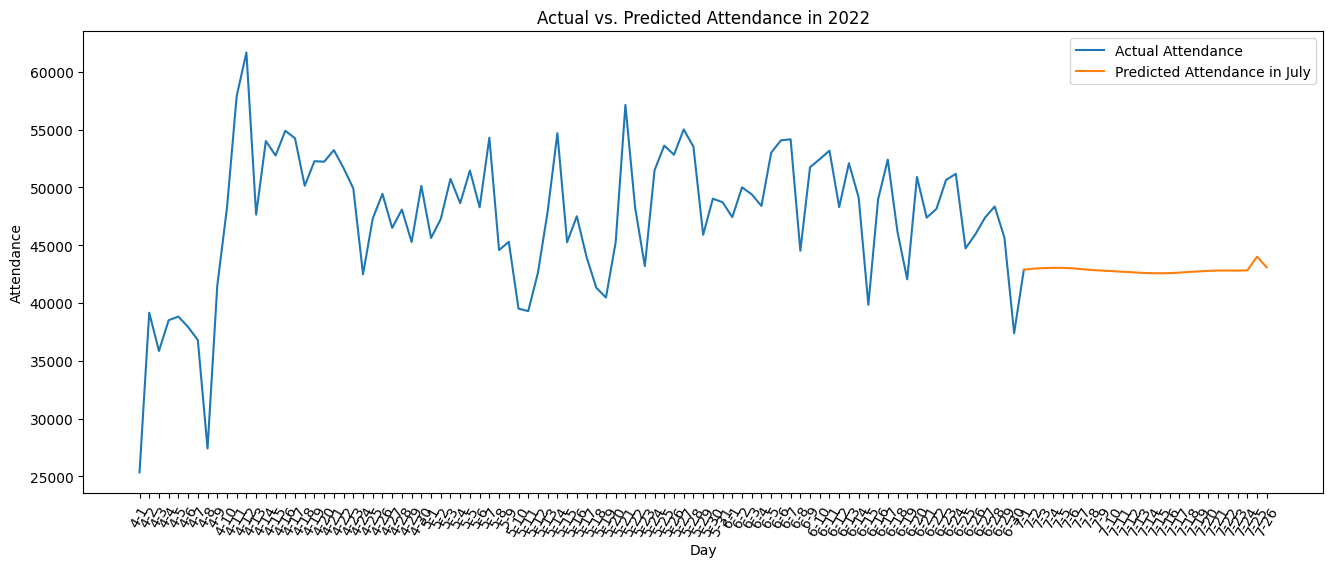

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(merged_2022['attendance'][:92], label='Actual Attendance')
plt.plot(merged_2022['attendance'][91:], label='Predicted Attendance in July')
plt.xlabel('Day')
plt.ylabel('Attendance')
plt.title('Actual vs. Predicted Attendance in 2022')
plt.legend()
plt.xticks(rotation=60)
plt.show()

In [ ]:
merged_2022 = merged_2022.reset_index(drop=False)
merged_2022 = merged_2022[['timestamp', 'attendance']]
merged_2022.to_csv('2022_prediction.csv', index=False)